# Clean and Analyze Employee Exit Surveys

In this project, we'll work with exit surveys from employees of the [Department of Education, Training and Employment](https://en.wikipedia.org/wiki/Department_of_Education_and_Training_(Queensland)) (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. The TAFE exit survey can be finded [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and the survey for the DETE [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

The aim of this project is to explore, transform and clean these datasets to answer the following questiongs to stakeholders:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

For this project, we'll use our general knowledge to define the columns.

Below is a preview of a couple columns we'll work with from the dete_survey.csv:

- ID: An id used to identify the participant of the survey
- SeparationType: The reason why the person's employment ended
- Cease Date: The year or month the person's employment ended
- DETE Start Date: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the tafe_survey.csv:

- Record ID: An id used to identify the participant of the survey
- Reason for ceasing employment: The reason why the person's employment ended
- LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)


In [1]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

## Datasets Description
In this section, we will briefly present the description of both datasets.

**Dete Survey Description**

In [2]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [3]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

This information shows how the dataset contains 56 columns, most of which are string. A deeper analysis need to be done to select only the columns needed to achive our aim. 

Six columns (* Business Unit, Aboriginal, Torres Strait, South Sea, Disability, NESB*) have more than ~80% null values. Notice that, the dataset represent the missing values as *Not Stated*. 

Then, we will replace this value to *NaN* in order to the pandas library recognize it as null value.

In [5]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

In [6]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

We can see how the number of missing values increase in some columns as *DETE Start Date, Role Start Date* and *Region*

**Tafe Survey Description**

In [7]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [8]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [9]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

This information shows how the dataset contains 72 columns, most of which are string. We can see how the dataset contain many columns that we don't need to complete our analysis and many of them represent the same information that some columns from dete_survey dataset, but with different names.

There are multiple columns/answers that indicate an employee resigned because they were dissatisfied. 

Most of the columns have null values, but only a few of them have more than ~30% null values.

## Cleaning the *dete_survey* and *tafe_survey*  datasets

**Identify Missing Values and Drop Unnecessary Columns**

Let's drop some columns from each dataframe that we won't use in our analysis to make the dataframes easier to work with. 

In [10]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

**Clean Column Names**

Let's turn the attention to the column names. Each dataframe contains many of the same columns, but the column names are different.

First, we will rename columns in the *dete_survey_updated* dataframe using the following criteria to update the column names:
- Make all the capitalization lowercase.
- Remove any trailing whitespace from the end of the strings.
- Replace spaces with underscores ('_').

In [11]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.strip().str.lower()
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

Second, we will rename columns in the tafe_survey_updated dataframe as follows:
- 'Record ID': 'id'
- 'CESSATION YEAR': 'cease_date'
- 'Reason for ceasing employment': 'separationtype'
- 'Gender. What is your Gender?': 'gender'
- 'CurrentAge. Current Age': 'age'
- 'Employment Type. Employment Type': 'employment_status'
- 'Classification. Classification': 'position'
- 'LengthofServiceOverall. Overall Length of Service at -Institute (in years)': 'institute_service'
- 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'

The columns renamed are the one that we will use in our analysis.

In [12]:
tafe_survey_updated.rename(columns = { 'Record ID': 'id', 'CESSATION YEAR': 'cease_date', 'Reason for ceasing employment':'separationtype', 'Gender. What is your Gender?':'gender', 'CurrentAge. Current Age': 'age', 'Employment Type. Employment Type': 'employment_status', 'Classification. Classification': 'position', 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}, inplace=True)
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

**Filter the Data**

Let's remove more of the data we don't need. Since our goal is to analyse the employees who resigned, we will only consider the respondents  that contains the string  *'Resignation'* in the *'separationtype*' column.

In [13]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [14]:
pattern_resignation = r"Resignation"
dete_resignations = dete_survey_updated.loc[dete_survey_updated['separationtype'].str.contains(pattern_resignation)].copy()
print(dete_resignations.shape)
dete_resignations['separationtype'].value_counts()

(311, 35)


Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [15]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [16]:
tafe_resignations = tafe_survey_updated.loc[tafe_survey_updated['separationtype'] == 'Resignation'].copy()
print(tafe_resignations.shape)
tafe_resignations['separationtype'].value_counts()

(340, 23)


Resignation    340
Name: separationtype, dtype: int64

In the last steps, we have saved in the *dete_resignations* and *tafe_resignations* dataframes the rows who represent the resignations from dete_survey_updated and tafe_survey_updated datasets, respectively.

**Verify the Data**

We'll focus on verifying that the years in the *cease_date* and *dete_start_date* columns make sense. We will check the following:
- Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
- Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.


In [17]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2006      1
07/2012      1
09/2010      1
Name: cease_date, dtype: int64

As can be seen, we need to clean the *cease_date* column in the dete_resignations dataset.

In [18]:
pattern_year = r"(?P<Years>[1-2][0-9]{3})"
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(pattern_year).astype(float)
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [19]:
dete_resignations['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

In [20]:
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

We will plot the values of these columns with a boxplot to identify any values that look wrong.

Text(0.5,1,'Distribution of cease_date in the tafe_resignations dataset')

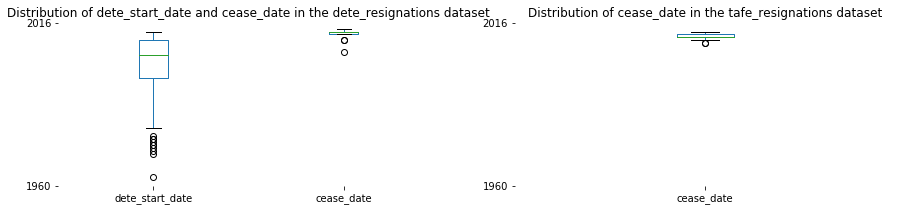

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df_columns_plot = dete_resignations[['dete_start_date','cease_date']]
fig = plt.figure(figsize=(15, 3))
ax = fig.add_subplot(1,2,1)
df_columns_plot.boxplot(ax=ax)
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)
ax.set_ylim(1960,2016)
ax.set_yticks([1960,2016])
ax.grid(False)
ax.set_title('Distribution of dete_start_date and cease_date in the dete_resignations dataset')

ax = fig.add_subplot(1,2,2)
tafe_resignations['cease_date'].plot.box(ax=ax)
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)
ax.set_ylim(1960,2016)
ax.set_yticks([1960,2016])
ax.set_title('Distribution of cease_date in the tafe_resignations dataset')

We can see how the years's values are logical. However, there are some outliers values from the *dete_start_date* column.

## Transforming the datasets

**Create column to represent years of service**

To get all the information needed to achive our goals, we need to create a new column that represents the length of time an employee spent in a workplace, called years of service in the Human Resources field. 

Notice that the *tafe_resignations* dataframe already contains a "service" column, which we renamed to *institute_service*. In order to analyze both surveys together, we'll have to create a corresponding institute_service column in dete_resignations. To do so, we will create an institute_service column in dete_resignations, substracting the *dete_start_date* from *the cease_date*. 


In [22]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
print(dete_resignations[['dete_start_date', 'cease_date', 'institute_service']].head())
dete_resignations['institute_service'].value_counts(dropna=False)
tafe_resignations.info()

    dete_start_date  cease_date  institute_service
3            2005.0      2012.0                7.0
5            1994.0      2012.0               18.0
8            2009.0      2012.0                3.0
9            1997.0      2012.0               15.0
11           2009.0      2012.0                3.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
id                                                     340 non-null float64
Institute                                              340 non-null object
WorkArea                                               340 non-null object
cease_date                                             335 non-null float64
separationtype                                         340 non-null object
Contributing Factors. Career Move - Public Sector      332 non-null object
Contributing Factors. Career Move - Private Sector     332 non-null object
Contributing Factors. Career Move - Self-employment    332 non

**Identify Dissatisfied Employees**

We'll identify any employees who resigned because they were dissatisfied.

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe. 

*tafe_survey_updated*:
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

*dete_survey_updated*:
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

To create the new column, we'll do the following:

1. Convert the values in the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' columns in the tafe_resignations dataframe to True, False, or NaN values.
2. If any of the columns listed above contain a True value, we'll add a True value to a new column named dissatisfied.

In [23]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [24]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [25]:
def update_vals(element):
    if pd.isnull(element):
        return np.nan
    if element == '-':
        return False
    else:
        return True
factor_dissatisfaction_tafe = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)
tafe_resignations['dissatisfied'] = factor_dissatisfaction_tafe.any(axis=1, skipna=False)
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [26]:
factor_dissatisfaction_dete = dete_resignations[['job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment','lack_of_recognition','lack_of_job_security','work_location','employment_conditions','work_life_balance','workload']]
dete_resignations['dissatisfied'] = factor_dissatisfaction_dete.any(axis=1, skipna=False)
dete_resignations['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [27]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

## Combine the datasets

In the last steps, we have transformed the dataframes to be ready to combine them. 

First, let's add a column to each dataframe that will allow us to easily distinguish between the two.

In [28]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index = True, sort=True)
combined.shape

(651, 53)

We still have some columns left in the dataframe that we don't need to complete our analysis. For this reason, we will drop any columns with less than 500 non null values.

In [29]:
combined_updated = combined.dropna(thresh=500, axis=1).copy()
combined_updated.shape

(651, 10)

We can see how the number of columns is reduced to 10.

In [30]:
combined_updated.head()

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
0,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7,Teacher,Resignation-Other reasons
1,41-45,2012.0,True,Permanent Full-time,Female,6.0,DETE,18,Guidance Officer,Resignation-Other reasons
2,31-35,2012.0,False,Permanent Full-time,Female,9.0,DETE,3,Teacher,Resignation-Other reasons
3,46-50,2012.0,True,Permanent Part-time,Female,10.0,DETE,15,Teacher Aide,Resignation-Other employer
4,31-35,2012.0,False,Permanent Full-time,Male,12.0,DETE,3,Teacher,Resignation-Move overseas/interstate


**Clean the *institute_service* column**

We'll have to clean up the institute_service column, since it currently contains values in a couple different forms

In [31]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
39.0                   3
21.0                   3
28.0                   2
30.0                   2
26.0                   2
36.0                   2
25.0                   2


To analyze the data, we'll convert these numbers into categories. We'll base our anlaysis on this [article](https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage). 

We'll use the slightly modified definitions below:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

Let's categorize the values in the *institute_service* column using the definitions above.

First, we'll extract the years of service from each value in the institute_service column.


In [32]:
combined_updated['institute_service_up'] = combined_updated.loc[:,'institute_service'].astype('str').str.extract(r'(\d{1,2})').astype('float')


Next, we'll map each value to one of the career stage definitions above store them at a new column *service_cat*

In [33]:
def category(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif 3 <= val <= 6:
        return 'Experienced'
    elif  7 <= val <= 10:
        return 'Established'
    elif  val >= 11:
        return 'Veteran'

combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(category)    
combined_updated['service_cat'].value_counts(dropna = False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

**Clean the *age* column**

We'll have to clean up the *age* column, since it currently contains values in a couple different forms

In [34]:
combined_updated['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
36  40           32
31  35           32
56 or older      29
21-25            29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

To analyze the data, we'll convert these ages into categories.

We'll use the definitions below:

- Young: Less than 35 years old
- Middle Age: 35-45 years old
- Old: 46 or more 

Let's categorize the values in the *age* column using the definitions above.

First, we'll extract the years of each value in the *age* column.


In [44]:
combined_updated['age_up'] = combined_updated.loc[:,'age'].astype('str').str.extract(r'(\d{2})').astype('float')
combined_updated['age_up'].value_counts(dropna=False)

 41.0    93
 46.0    81
 36.0    73
 51.0    71
 26.0    67
 21.0    62
 31.0    61
NaN      55
 56.0    55
 61.0    23
 20.0    10
Name: age_up, dtype: int64

Next, we'll map each value to one of the age categories defined above and store them at a new column *age_category*

In [41]:
def age_category(val):
    if pd.isnull(val):
        return np.nan
    elif val < 35:
        return 'Young'
    elif 35 <= val <= 45:
        return 'Middle Age'
    elif  val >= 46:
        return 'Old'

combined_updated['age_category'] = combined_updated['age_up'].apply(age_category)    
combined_updated['age_category'].value_counts(dropna = False)

Old           230
Young         200
Middle Age    166
NaN            55
Name: age_category, dtype: int64

**Fill missing values in  dissatisfied column**

Now, we will fill missing values in the dissatisfied column with the value that occurs most frequently in this column.

In [37]:
combined_updated['dissatisfied'].value_counts(dropna = False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [38]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)
combined_updated['dissatisfied'].value_counts(dropna = False)

False    411
True     240
Name: dissatisfied, dtype: int64

## Initial Analysis

**Percentage of dissatisfied employees in each *service_cat* group**

We will aggregate the dissatisfied column to calculate the percentage of dissatisfied employees in each *service_cat* group. Since a *True* value is considered to be 1, calculating the mean will also calculate the percentage of dissatisfied employees. 

In [39]:
percentage_service_dissatisfied = combined_updated.pivot_table('dissatisfied','service_cat')
percentage_service_dissatisfied

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


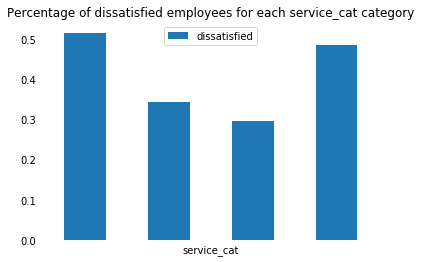

In [52]:
ax = percentage_service_dissatisfied.plot(kind='bar')
ax.set_title('Percentage of dissatisfied employees for each service_cat category')
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)
ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)

The figure shows how the higuer percentage of dissatisfied employees belongs to the *Established* and *Veteran* groups with values close to 50% of the employees. Then, the employees who have been longer period of time in the institues resigning due to some kind of dissatisfaction more than the one who have been shorter time.

**Percentage of dissatisfied employees in each age category group**

Let's agregate the dissatisfied column to calculate the percentage of dissatisfied employees in each *age* group.

In [45]:
percentage_age_dissatisfied = combined_updated.pivot_table('dissatisfied','age_category')
percentage_age_dissatisfied

,dissatisfied
age_category,
Middle Age,0.361446
Old,0.408696
Young,0.360000


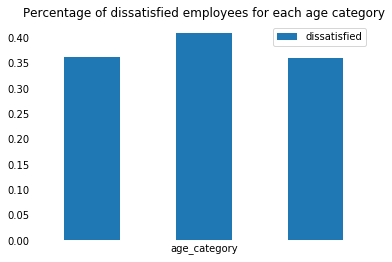

In [53]:
ax = percentage_age_dissatisfied.plot(kind='bar')
ax.set_title('Percentage of dissatisfied employees for each age category')
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)
ax.tick_params(bottom=False, top=False, left=False, right=False, labelbottom=False)

The figure shows how the higuer percentage of dissatisfied employees belongs to the older people. However, almost the 36% of the younger people resigning due to some kind of dissatisfaction.

# Conclusion

In this project, we analyzed survey data from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Australia to analyse the characteristics of the employees who resigning due to some kind of dissatisfaction. We reached that older employees who spend more time in the institues present higher probabilities to resigning because dissatisfaction than younger people who work less time in these institues.
